In [1]:
from read_write_mrc import read_mrc, write_mrc
from patchify import patchify, unpatchify
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def create_patches_list(img):
    
    patches = []
    
    patches_x = patchify(img, (64,704,704), step= (32,32,32))
    patches_x = patches_x.squeeze((1,2))
    
    for i in range(patches_x.shape[0]):
        patches.append(patches_x[i])
    
    tmp = np.rot90(img, axes=(0,1))
    patches_y = np.flip(tmp, axis = 0)
    patches_y = patchify(patches_y, (64,704,704), step = 32)
    patches_y = patches_y.squeeze((1,2))
    
    
    for i in range(patches_y.shape[0]):
        patches.append(patches_y[i])
    
    tmp = np.rot90(tmp, axes=(2,0))
    patches_z = patchify(tmp, (64 ,704 ,704), step = 32)
    patches_z = patches_z.squeeze((1,2))  
    
    
    for i in range(patches_z.shape[0]):
        patches.append(patches_z[i])
    
    return patches

In [3]:
def create_patches(img):
    patches_x = patchify(img, (64,704,704), step= (32,32,32))
    patches_x = patches_x.squeeze((1,2))
    tmp = np.rot90(img, axes=(0,1))
    patches_y = np.flip(tmp, axis = 0)
    patches_y = patchify(patches_y, (64,704,704), step = 32)
    patches_y = patches_y.squeeze((1,2))                 
    tmp = np.rot90(tmp, axes=(2,0))
    patches_z = patchify(tmp, (64 ,704 ,704), step = 32)
    patches_z = patches_z.squeeze((1,2))    
    return np.concatenate((patches_x, patches_y, patches_z), axis = 0)

In [4]:
img = read_mrc('../data/mrc_train/KLW_PBC_INS1e_Ex-4_30min_1127_11_pre_rec_final_.mrc')

In [5]:
img_patches = create_patches_list(img)

In [6]:
len(img_patches)

63

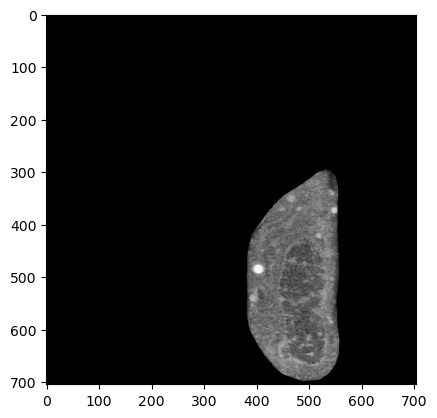

In [7]:
plt.figure()
plt.imshow(img[371,:,:], cmap = 'gray')
plt.show()

In [8]:
371-32*11

19

In [9]:
slice = read_mrc("../slices/mrc_test/KLW_PBC_INS1e_Ex-4_5min_1128_1_pre_rec_final_11.mrc")
mask_slice = read_mrc("../slices/mask_test/KLW_PBC_INS1e_Ex-4_5min_1128_1_pre_rec_final_labels11.mrc")

In [10]:
mask_slice.shape

(64, 704, 704)

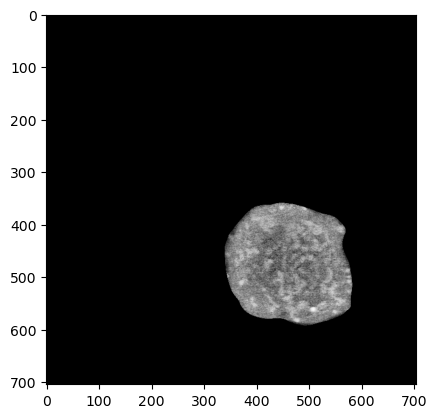

In [11]:
plt.figure()
plt.imshow(slice[19,:,:], cmap = 'gray')
plt.show()

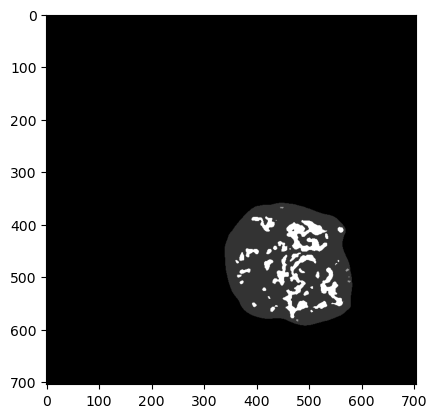

In [12]:
plt.figure()
plt.imshow(mask_slice[19,:,:], cmap = 'gray')
plt.show()

In [13]:
patches = create_patches(img)

In [14]:
print(patches.shape)

(63, 64, 704, 704)


In [15]:
521-32*16

9

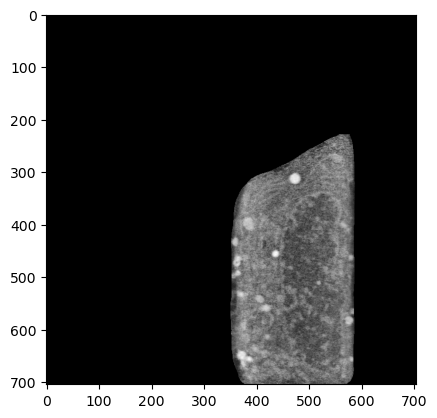

In [16]:
plt.figure()
plt.imshow(img[521,:,:], cmap = 'gray')
plt.show()

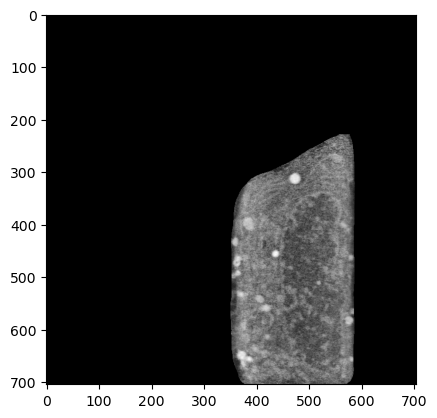

In [17]:
plt.figure()
plt.imshow(patches[16,9,:,:], cmap = 'gray')
plt.show()

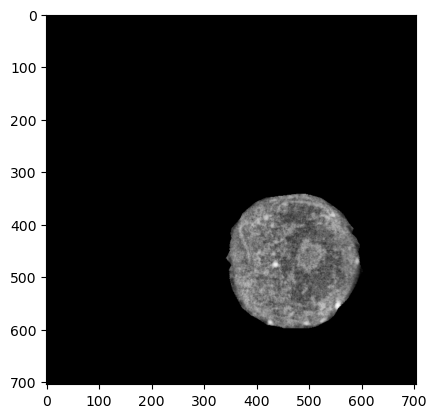

In [18]:
plt.figure()
plt.imshow(img[:,521,:], cmap = 'gray')
plt.show()

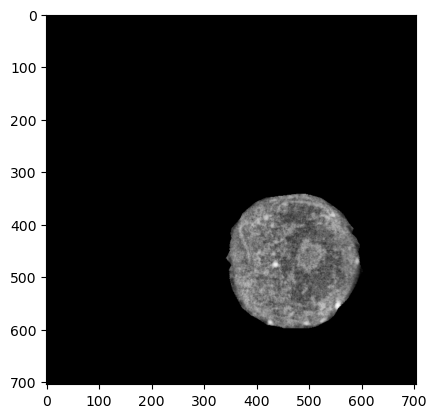

In [19]:
plt.figure()
plt.imshow(patches[37,9,:,:], cmap = 'gray')
plt.show()

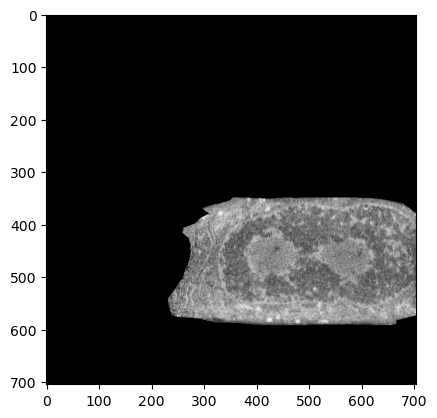

In [20]:
plt.figure()
plt.imshow(img[:,:,521], cmap = 'gray')
plt.show()

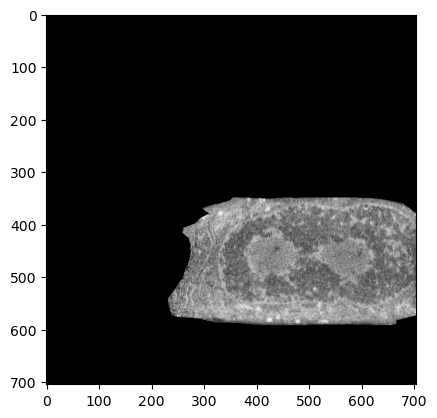

In [21]:
plt.figure()
plt.imshow(patches[58,9,:,:], cmap = 'gray')
plt.show()

In [22]:
521-32*16

9

In [23]:
mask = read_mrc('../data/mask_train/KLW_PBC_INS1e_Ex-4_30min_1127_11_pre_rec_final_labels.mrc')

In [24]:
img_x = patchify(img, (64,704,704), step= (32,32,32))
mask_x = patchify(mask, (64,704,704), step = (32,32,32))

In [25]:
img_x.shape

(21, 1, 1, 64, 704, 704)

In [26]:
mask_x.shape

(21, 1, 1, 64, 704, 704)

In [27]:
i = 450

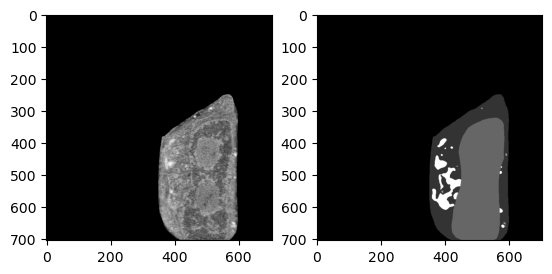

In [28]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img[i], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(mask[i], cmap = 'gray')
plt.show()

In [29]:
450-32*13

34

In [30]:
i = 34

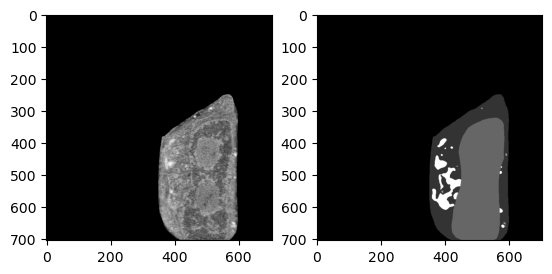

In [31]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_x[13,0,0,i], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(mask_x[13,0,0,i], cmap = 'gray')
plt.show()

In [32]:
tmp_img = np.rot90(img, axes=(0,1))
img_y = np.flip(tmp_img, axis = 0)
img_y = patchify(img_y, (64,704,704), step = (32,32,32))

tmp_mask = np.rot90(mask, axes=(0,1))
mask_y = np.flip(tmp_mask, axis = 0)
mask_y = patchify(mask_y, (64,704,704), step = (32,32,32))

In [33]:
img_y.shape

(21, 1, 1, 64, 704, 704)

In [34]:
mask_y.shape

(21, 1, 1, 64, 704, 704)

In [35]:
i = 450

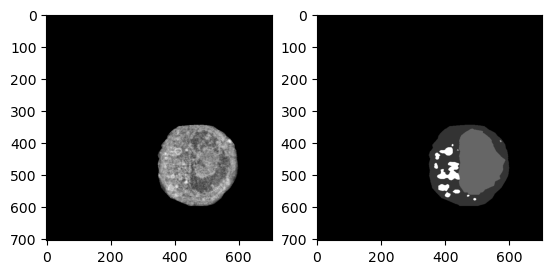

In [36]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img[:,i], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(mask[:,i], cmap = 'gray')
plt.show()

In [37]:
450-32*13

34

In [38]:
i = 34

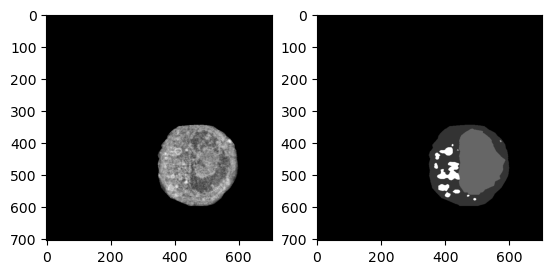

In [39]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_y[13,0,0,i], cmap = 'gray')   # or we can use 14,0,0,2
plt.subplot(1,2,2)
plt.imshow(mask_y[13,0,0,i], cmap = 'gray')
plt.show()

In [40]:
tmp_img = np.rot90(tmp_img, axes=(2,0))
img_z = patchify(tmp_img, (64 ,704 ,704), step = (32,32,32))

tmp_mask = np.rot90(tmp_mask, axes=(2,0))
mask_z = patchify(tmp_mask, (64 ,704 ,704), step = (32,32,32))

In [41]:
img_z.shape

(21, 1, 1, 64, 704, 704)

In [42]:
mask_z.shape

(21, 1, 1, 64, 704, 704)

In [43]:
i = 450

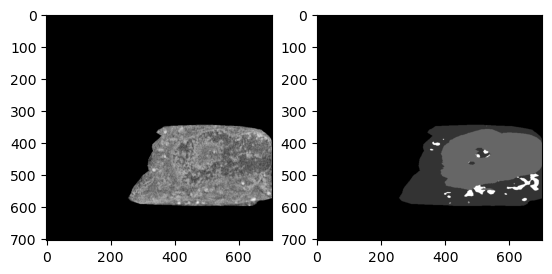

In [44]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img[:,:,i], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(mask[:,:,i], cmap = 'gray')
plt.show()

In [45]:
i=34

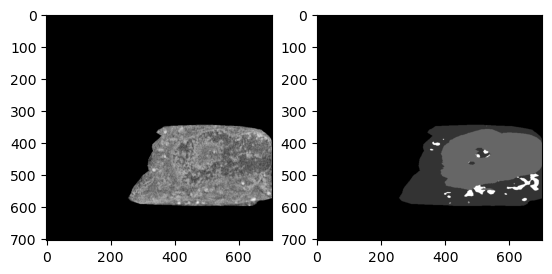

In [46]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_z[13,0,0,i], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(mask_z[13,0,0,i], cmap = 'gray')
plt.show()

In [ ]:
dd